# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.112599e+01     7.834835e+00
 * time: 0.004213094711303711
     1     2.325363e+01     3.464346e+00
 * time: 0.02242112159729004
     2     1.677245e+01     3.380021e+00
 * time: 0.039782047271728516
     3     1.175478e+01     2.143113e+00
 * time: 0.05721902847290039
     4     9.998532e+00     1.095149e+00
 * time: 0.07488012313842773
     5     9.300769e+00     1.343815e+00
 * time: 0.08896207809448242
     6     8.832626e+00     7.824283e-01
 * time: 0.10298299789428711
     7     8.603497e+00     6.689952e-01
 * time: 0.1168670654296875
     8     8.391889e+00     7.886726e-01
 * time: 0.13062405586242676
     9     8.223655e+00     4.548419e-01
 * time: 0.14435815811157227
    10     8.138963e+00     4.923096e-01
 * time: 0.15828514099121094
    11     8.071132e+00     4.353264e-01
 * time: 0.1726090908050537
    12     8.039192e+00     5.685008e-01
 * time: 0.18339300155639648
    13     7.988936e+00     4.311241e-01
 * time:

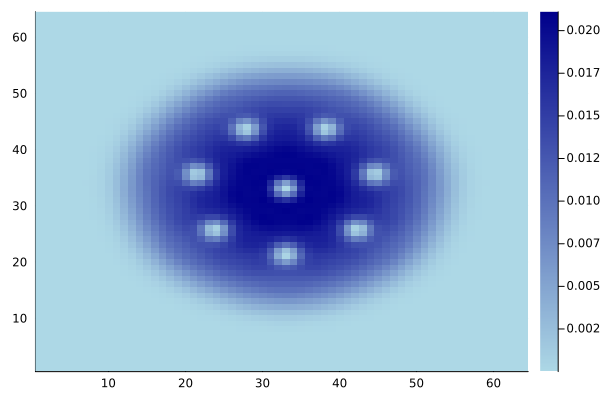

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)